# Esercitazione 10

## Exercise 10.1

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

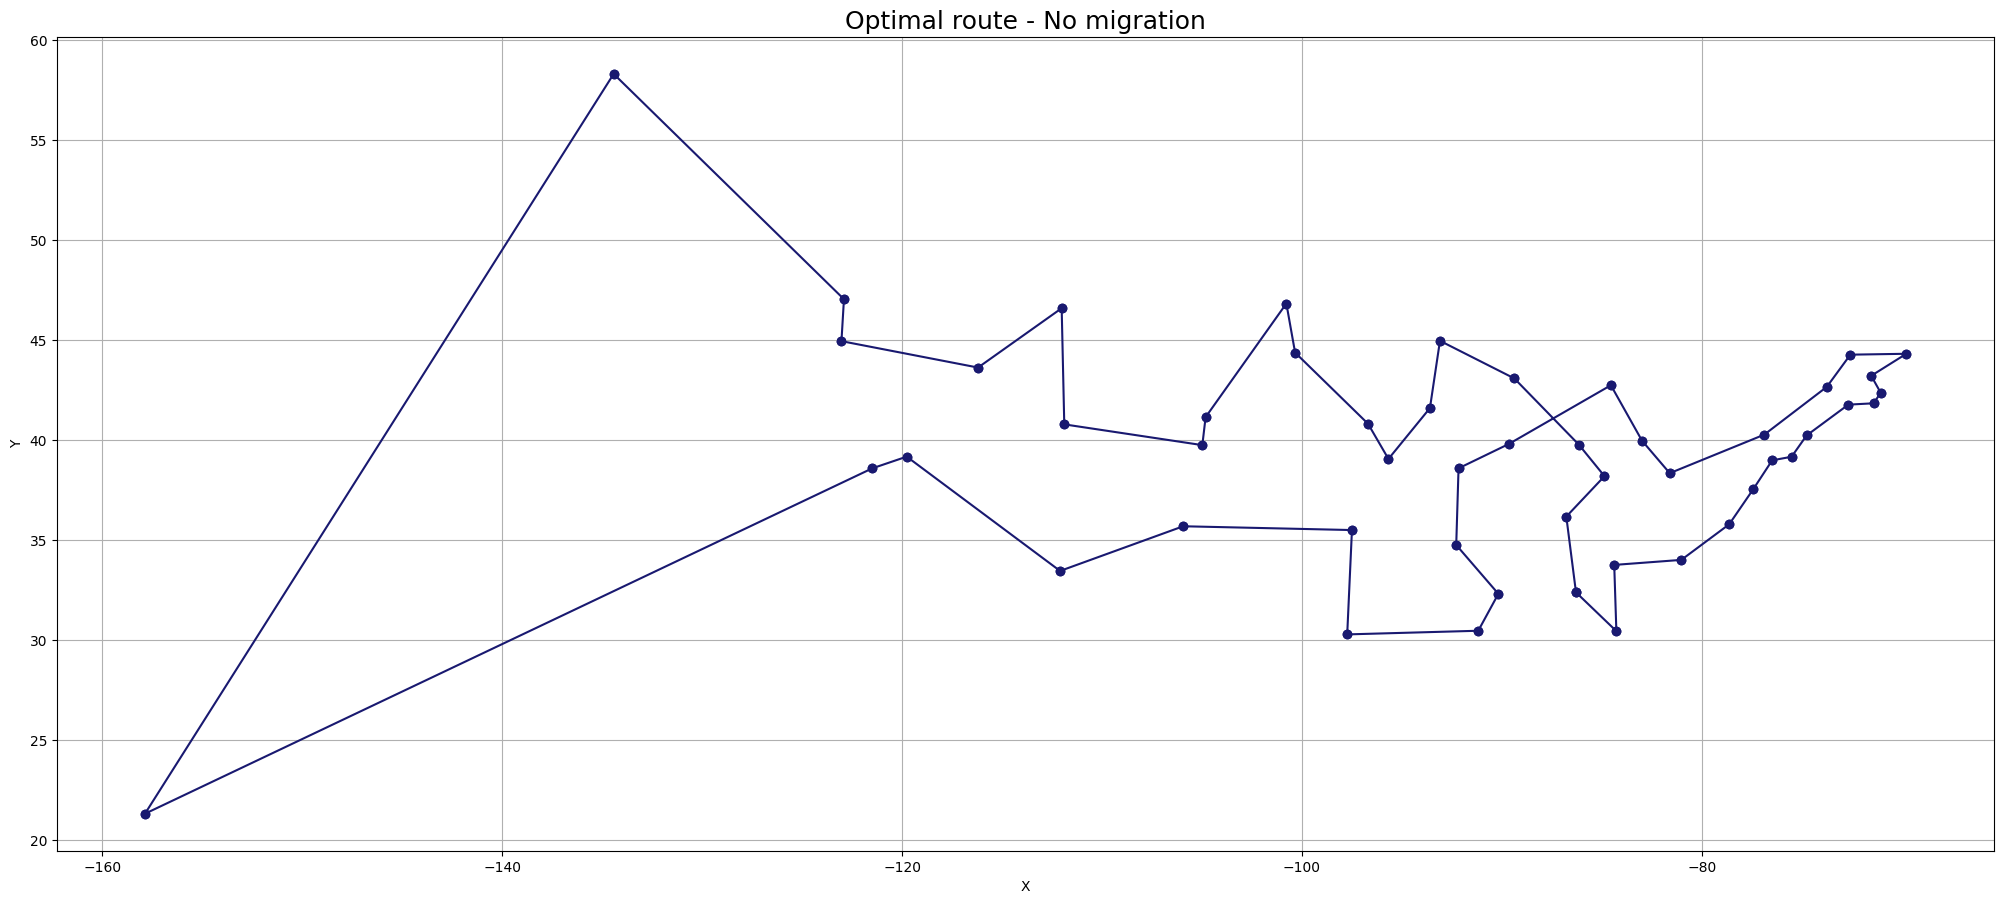

Shortest route - No migration:  277.979


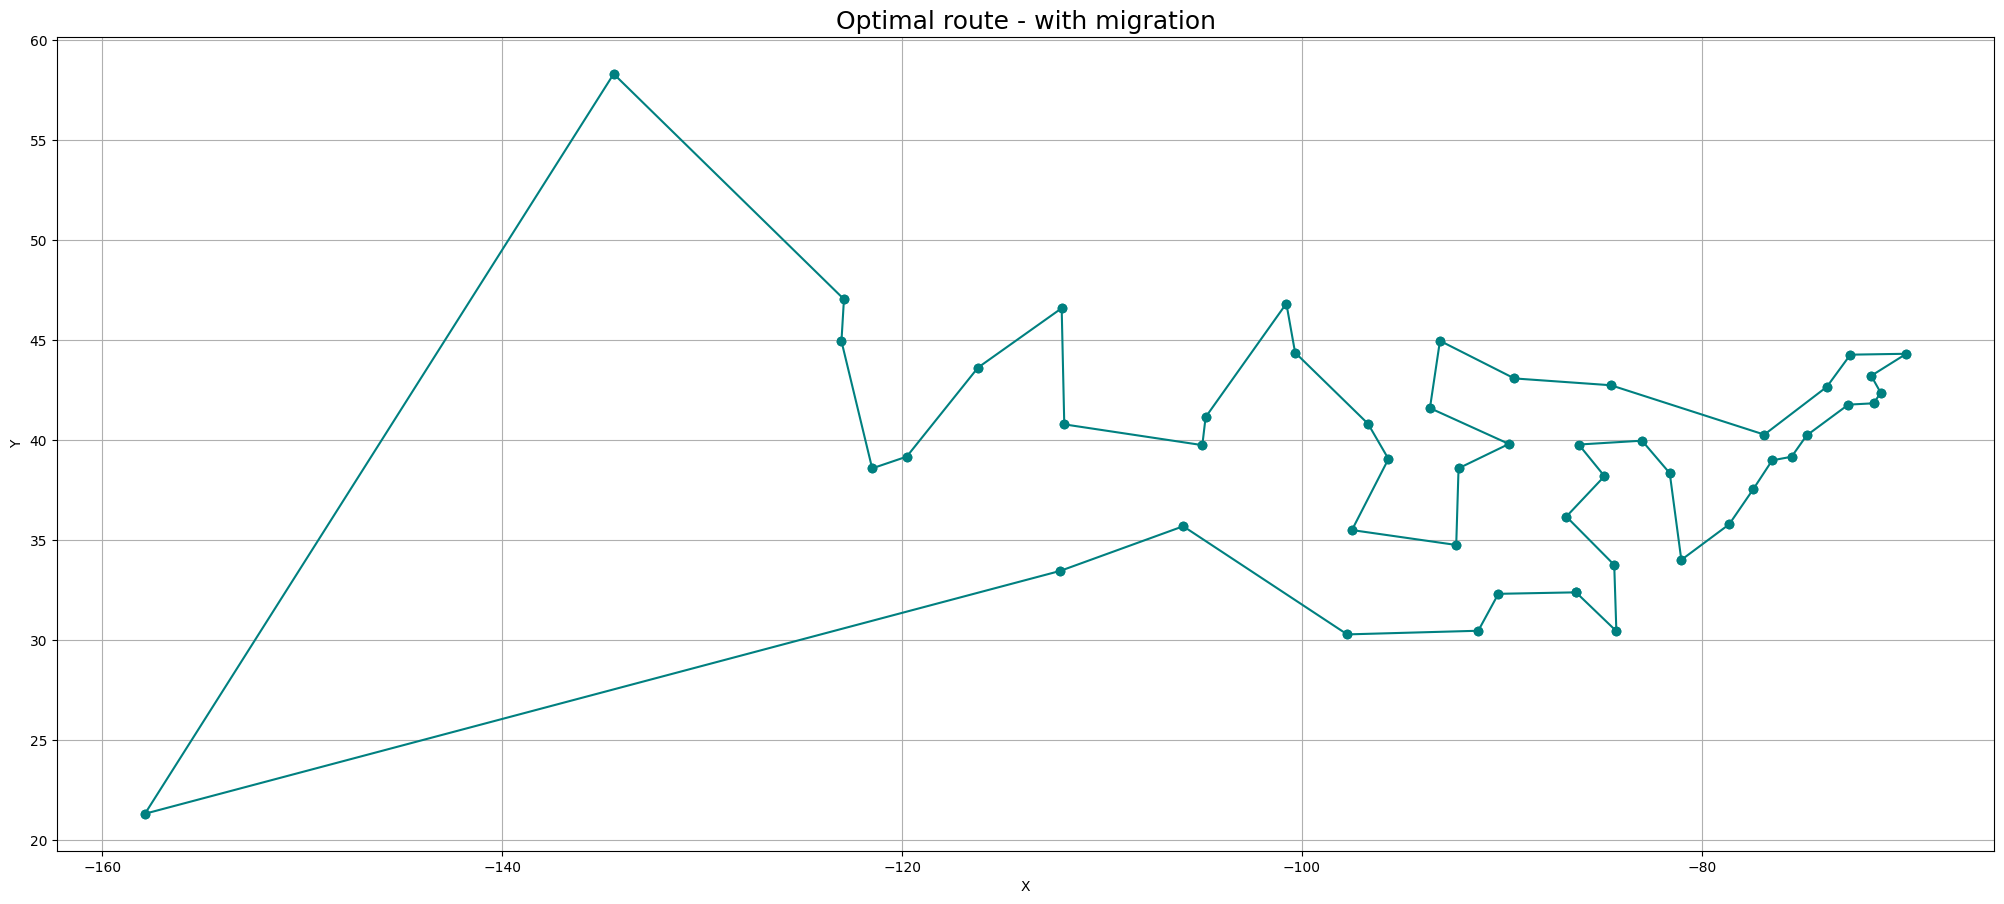

Shortest route - with migration:  278.368


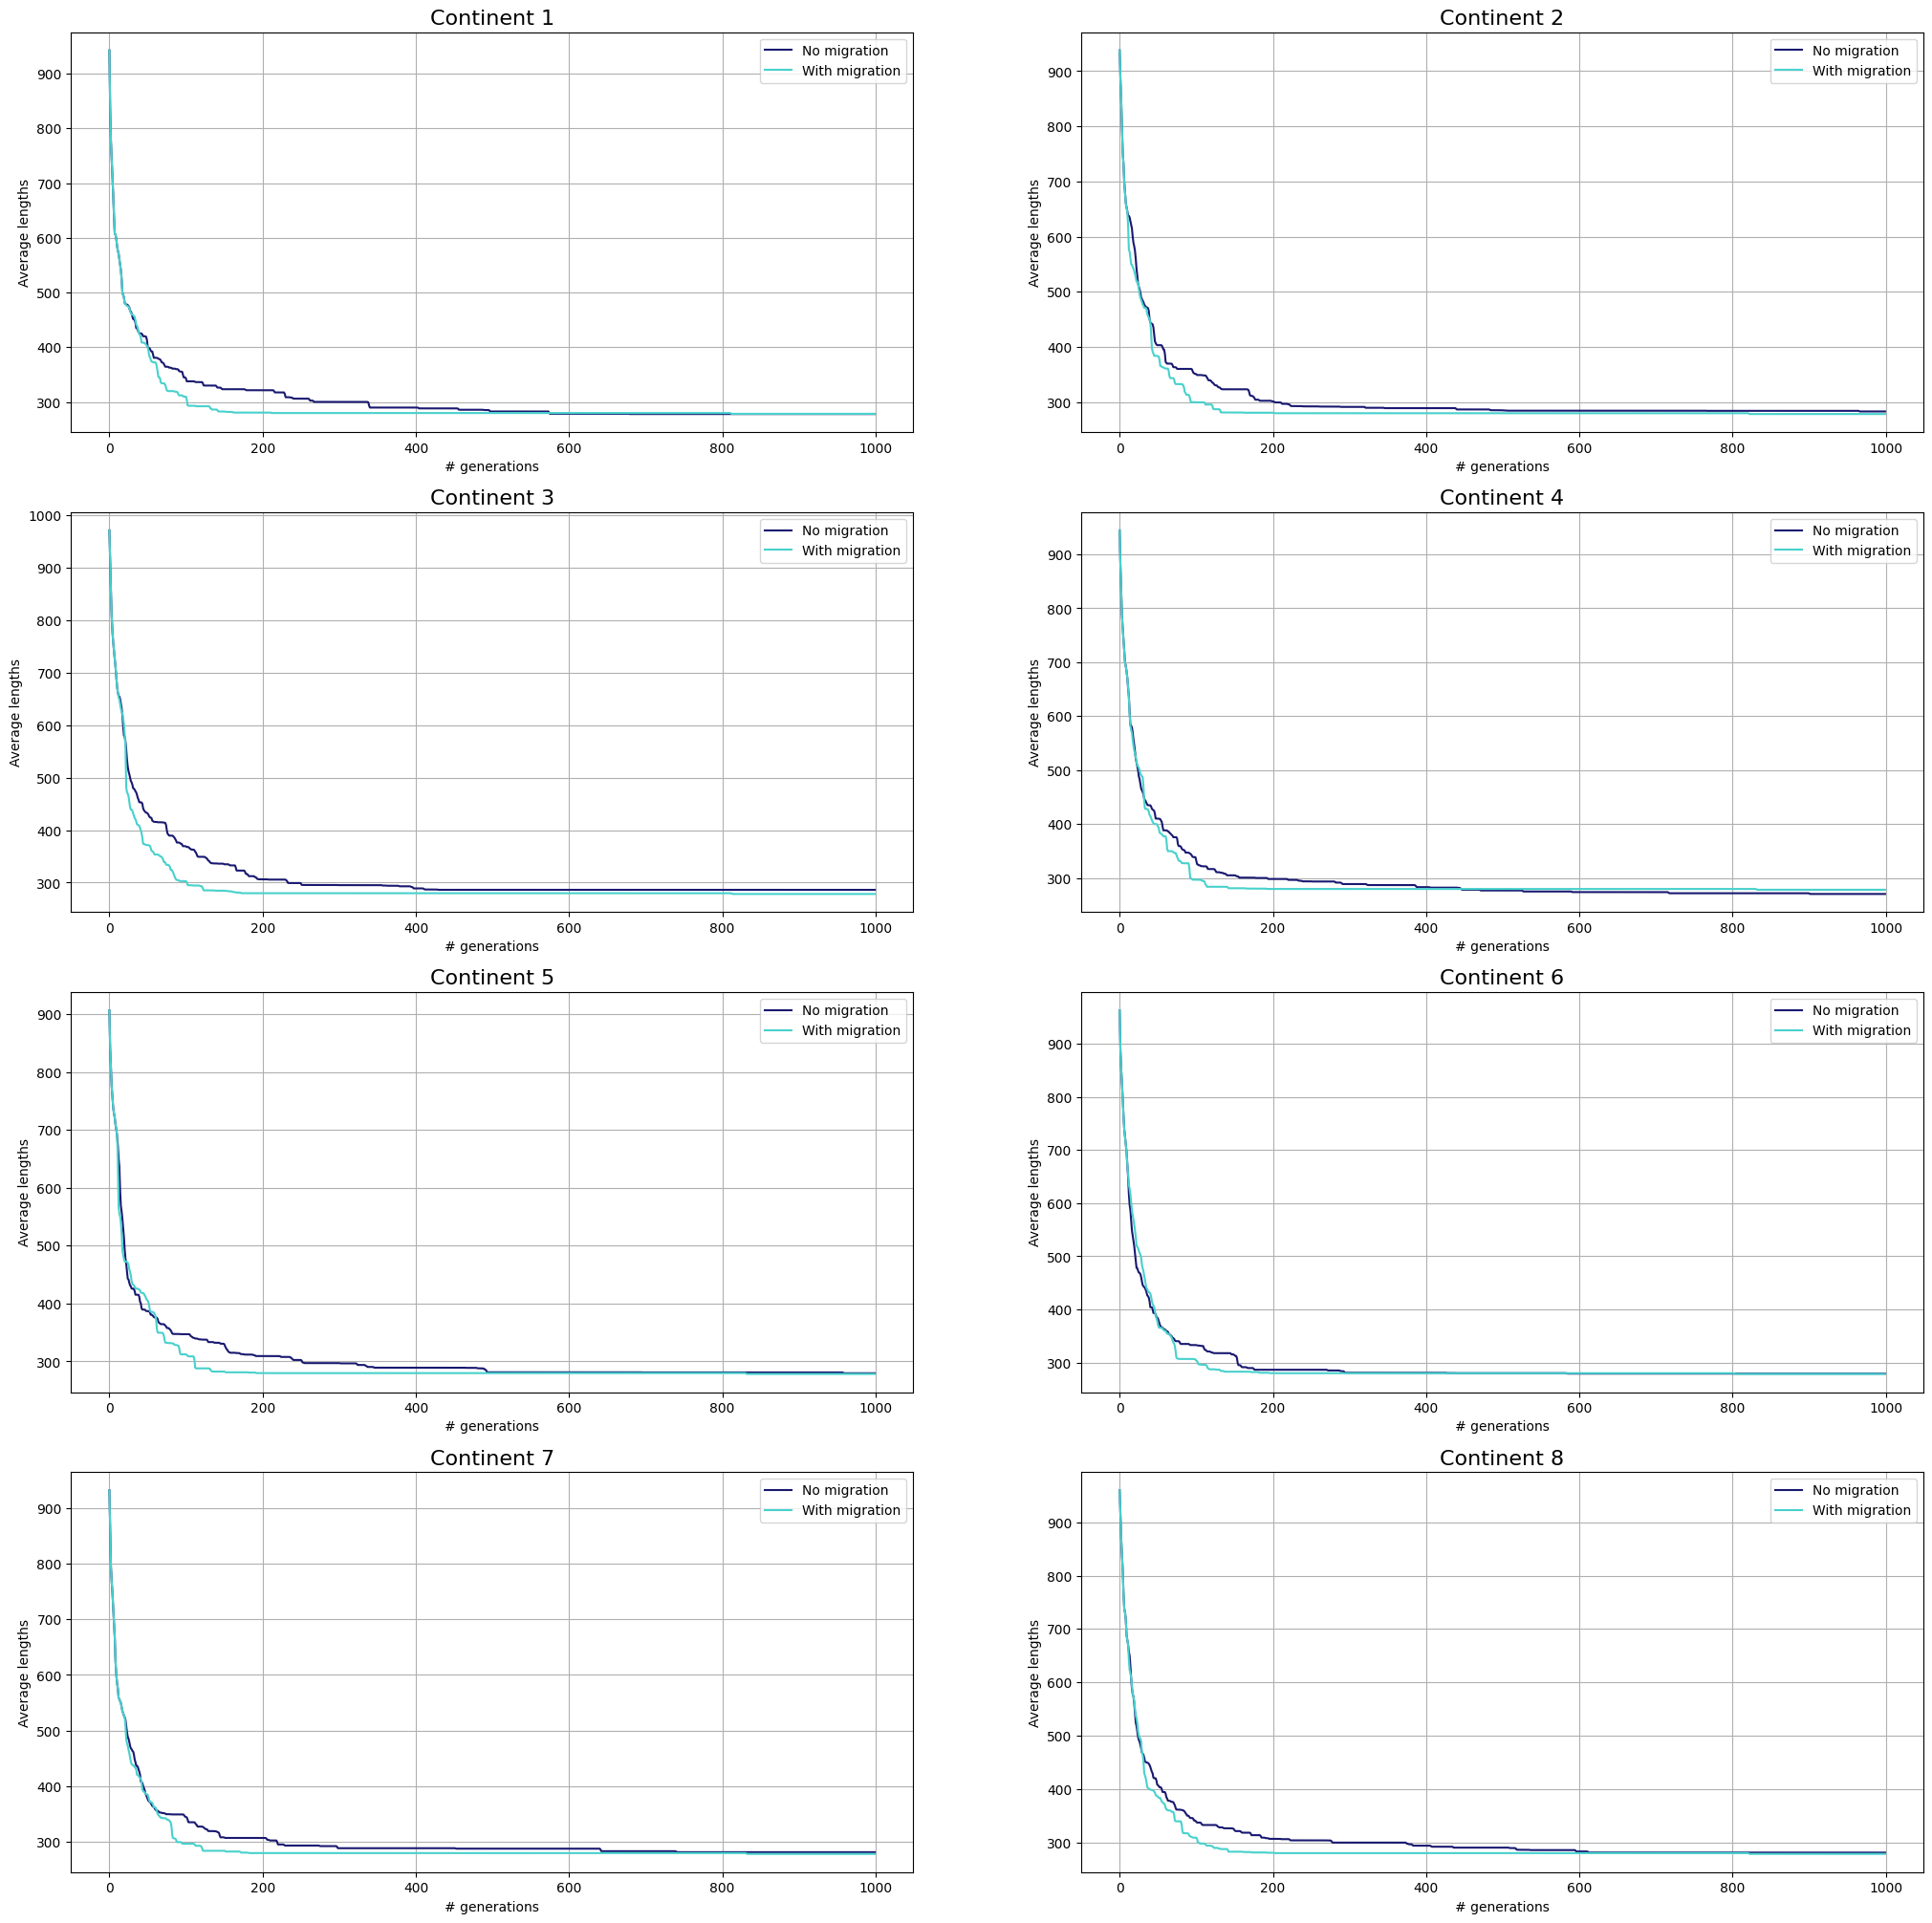

In [3]:
# Map coordinates
citymap = np.loadtxt("Map.out")

########################### Best path - No migration
x_nomig = citymap[:, 0]
y_nomig = citymap[:, 1]

best_nomig = np.loadtxt("Cities_nomig.dat")
indices = [int(index) for index in best_nomig[1:]]

# Create connected point pairs based on the order of indices
connected_points = [(x_nomig[i], y_nomig[i]) for i in indices]
connected_points.append((x_nomig[indices[0]], y_nomig[indices[0]]))

# Plot connected points
fig, ax = plt.subplots(figsize=(25,25))
ax.set_aspect('equal')
ax.scatter(x_nomig, y_nomig, color="midnightblue")
ax.plot(*zip(*connected_points), '-o', color="midnightblue")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Optimal route - No migration', fontsize=18)
plt.grid(True)
plt.show()

print("Shortest route - No migration: ", best_nomig[0])

########################### Best path - With migration
x_mig = citymap[:, 0]
y_mig = citymap[:, 1]

best_mig = np.loadtxt("Cities_mig.dat")
indices2 = [int(index) for index in best_mig[1:]]

# Create connected point pairs based on the order of indices
connected_points2 = [(x_mig[i], y_mig[i]) for i in indices2]
connected_points2.append((x_mig[indices2[0]], y_mig[indices2[0]]))

# Plot connected points
fig, ax = plt.subplots(figsize=(25,25))
ax.set_aspect('equal')
ax.scatter(x_mig, y_mig, color = "teal")
ax.plot(*zip(*connected_points2), '-o', color = "teal")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Optimal route - with migration', fontsize=18)
plt.grid(True)
plt.show()

print("Shortest route - with migration: ", best_mig[0])

################################ Average lengths graphs

name_nomig = ["AverageLengths_nomig_0.dat", "AverageLengths_nomig_1.dat", "AverageLengths_nomig_2.dat", "AverageLengths_nomig_3.dat", 
        "AverageLengths_nomig_4.dat", "AverageLengths_nomig_5.dat", "AverageLengths_nomig_6.dat", "AverageLengths_nomig_7.dat"]

name_mig = ["AverageLengths_mig_0.dat", "AverageLengths_mig_1.dat", "AverageLengths_mig_2.dat", "AverageLengths_mig_3.dat", 
        "AverageLengths_mig_4.dat", "AverageLengths_mig_5.dat", "AverageLengths_mig_6.dat", "AverageLengths_mig_7.dat"]
color = ["midnightblue", "mediumturquoise"]

fig, axes = plt.subplots(4, 2, figsize=(25, 25))

for i in range(8): 
    
    ax = axes[ i//2, i%2 ]
    
    data_nomig = np.loadtxt( name_nomig[i] )
    data_mig = np.loadtxt( name_mig[i] )
    
    ax.plot(data_nomig[:,0], data_nomig[:,1], color=color[0], label="No migration")
    ax.plot(data_mig[:,0], data_mig[:,1], color=color[1], label="With migration")
    
    ax.set_title("Continent " + str(i+1), fontsize=16)
    ax.set_xlabel("# generations")
    ax.set_ylabel("Average lengths")
    ax.legend()
    ax.grid(True)
    
plt.show()

Si osserva che i risultati prodotti con la migrazione degli individui migliori arrivano più rapidamente al minimo. I risultati sono in generale migliori. <br>
La differenza dei risultati prodotti diventa sempre più trascurabile all'aumentare delle generazioni. La programmazione parallela permette di avere un codice più efficiente nel momento in cui vengono scambiate informazioni tra i nodi, mentre non si nota un miglioramento netto se i nodi agiscono in modo indipendente. 
In modo da rendere il codice più veloce, sono state usate comunicazioni non bloccanti con MPI_Isend e MPI_Irecv, con l'accortezza di inserire MPI_Wait per terminare l'operazione di invio o ricezione di informazioni prima di iniziarne un'altra.